**Install All the Required Libraries**

In [ ]:
# Install the 'datasets' library to load data from Hugging Face into the Google Colab Notebook.
# Install the 'transformers' library to utilize the AutoTokenizer for converting raw text into tokens.
# Install the 'sentence_transformers' library to acquire the embedding model.
# Install 'faiss-gpu' for efficient similarity searches with dense vectors.
!pip install -q datasets transformers sentence_transformers faiss-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 34.5 MB/s eta 0:00:00


**Set the Environment to Use Hugging Face Token:** Ensure that the environment is configured to authenticate using your Hugging Face API token.

In [ ]:
import os
from IPython.display import clear_output
from getpass import getpass

# Prompt for the Hugging Face token securely
hf_token = getpass("Please enter your Hugging Face token: ")
os.environ["HF_TOKEN"] = hf_token
clear_output(wait=True)
print("Token successfully set.")


Token successfully set.


**Load the Dataset**

In [ ]:
from datasets import load_dataset
dataset = load_dataset("garage-bAInd/Open-Platypus")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/24926 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'data_source'],
        num_rows: 24926
    })
})

In [ ]:
dataset["train"]

Dataset({
    features: ['input', 'output', 'instruction', 'data_source'],
    num_rows: 24926
})

In [ ]:
# Read the Dataset as the Pandas Dataset
dataset["train"].to_pandas()

input                                             output  \
0            To find the probability of the spinner landing...   
1            I need to choose 6 people out of 14, and the o...   
2            First we count the number of all 4-letter word...   
3            She can do this if and only if at least one of...   
4            Think of the problem as a sequence of H's and ...   
...     ...                                                ...   
24921        There are several formulas that generate all p...   
24922        Sure, here are some of the best universities:\...   
24923        [Enter stage left]\n\nFirst Citizen: Good morr...   
24924        That's a very thoughtful idea! Here are some s...   
24925        Certainly! Here's an implementation of the Tim...   

                                             instruction    data_source  
0      A board game spinner is divided into three par...  MATH/PRM-800K  
1      My school's math club has 6 boys and 8 girls. ...  MATH/PRM-800K  
2      How many 4-letter words with at least one cons...  MATH/PRM-800K  
3      Melinda will roll two standard six-sided dice ...  MATH/PRM-800K  
4      Let $p$ be the probability that, in the proces...  MATH/PRM-800K  
...                                                  ...            ...  
24921  Can we find a formula to generate all prime nu...        guanaco  
24922  What are some of the best university's for stu...        guanaco  
24923  Write me a SPL (Shakespeare Programming Langua...        guanaco  
24924  Hi. I want to make an embossed picture for my ...        guanaco  
24925  Please implement the Timsort algorithm on Lean...        guanaco  

[24926 rows x 4 columns]

**Analyzing the Dataset**

In [ ]:
# Import AutoTokenizer from transformers to tokenize text for model processing
from transformers import AutoTokenizer
# Import matplotlib for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt
# Import seaborn for making statistical graphics in Python
import seaborn as sns

# Load the tokenizer for Llama 2 from Nous Research, this tokenizer prepares text inputs for the Llama 2 model
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [ ]:
# Import the tokenizer from the transformers library.
from transformers import AutoTokenizer

# Initialize the tokenizer with the specific model from Nous Research. This tokenizer is used to convert text into tokens.
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

# The dataset variable should contain your data. Assuming it's loaded with datasets library and has a 'train' split.
# This section assumes the dataset is loaded and has an "instruction" column that we want to tokenize.

# Tokenize each instruction in the dataset's training split. This loop goes through each example in the training set,
# tokenizes the text found in the "instruction" column, and calculates the number of tokens in each instruction.
instruction_tokens_count = [len(tokenizer.tokenize(example["instruction"])) for example in dataset["train"]]

# Print the total count of tokens in each instruction. This will output a list where each entry is the token count
# for a corresponding instruction in the dataset.
print("Instruction Tokens Count", instruction_tokens_count)

# Print the total number of instructions processed. This tells us how many instructions have been tokenized
# and counted in the dataset.
print("Length of Instruction Tokens Count", len(instruction_tokens_count))


Instruction Tokens Count [85, 53, 75, 86, 82, 30, 46, 36, 101, 41, 19, 102, 34, 20, 54, 132, 104, 37, 171, 62, 23, 52, 43, 149, 184, 124, 47, 112, 60, 55, 95, 114, 59, 14, 52, 51, 153, 23, 26, 44, 21, 83, 19, 62, 55, 11, 65, 37, 100, 44, 61, 154, 88, 12, 37, 11, 32, 191, 148, 77, 30, 25, 69, 27, 22, 115, 53, 31, 35, 86, 72, 119, 17, 130, 25, 10, 25, 61, 33, 26, 37, 93, 30, 193, 21, 11, 88, 61, 22, 19, 305, 81, 87, 73, 51, 111, 64, 66, 25, 29, 73, 349, 126, 60, 117, 21, 40, 54, 63, 30, 74, 68, 38, 24, 65, 75, 67, 79, 110, 74, 171, 84, 372, 79, 18, 31, 22, 27, 13, 68, 120, 43, 41, 48, 665, 32, 35, 47, 97, 110, 57, 51, 17, 42, 25, 247, 45, 56, 100, 10, 10, 335, 72, 42, 27, 13, 58, 173, 10, 239, 55, 54, 122, 25, 72, 56, 10, 14, 35, 328, 41, 54, 64, 102, 57, 228, 232, 40, 57, 33, 30, 55, 38, 136, 108, 53, 66, 89, 66, 23, 128, 123, 77, 31, 14, 107, 37, 151, 44, 144, 46, 37, 43, 195, 83, 82, 23, 23, 322, 170, 15, 46, 78, 44, 24, 34, 203, 86, 152, 40, 49, 53, 23, 54, 33, 42, 61, 115, 55, 107, 

In [ ]:
# Tokenize each "output" entry in the training dataset. We perform a loop over each example in 'train'.
# For each example, we extract the text in the "output" column, tokenize this text, and then calculate
# the number of tokens. The result is a list of token counts, where each count corresponds to an example.
output_tokens_count = [len(tokenizer.tokenize(example["output"])) for example in dataset["train"]]

# Print the list of token counts for each output in the training dataset. This provides a visualization
# of the number of tokens per output text, useful for understanding the data's complexity and variability.
print("Output Tokens Count", output_tokens_count)

# Print the total number of outputs processed, which is the length of the 'output_tokens_count' list.
# This number tells us how many output texts have been tokenized and counted in the dataset.
print("Length of the Output Tokens Count", len(output_tokens_count))


Output Tokens Count [223, 105, 193, 96, 440, 217, 324, 80, 267, 267, 135, 194, 251, 194, 130, 958, 158, 76, 137, 201, 256, 206, 384, 59, 306, 558, 634, 98, 122, 423, 122, 142, 178, 210, 215, 306, 124, 306, 209, 216, 40, 513, 239, 278, 130, 505, 228, 315, 112, 169, 625, 326, 544, 186, 375, 286, 125, 421, 374, 87, 96, 141, 149, 104, 32, 227, 195, 133, 181, 432, 78, 553, 609, 437, 428, 167, 355, 413, 143, 322, 165, 317, 108, 414, 197, 20, 101, 483, 426, 356, 805, 277, 293, 312, 355, 189, 74, 58, 76, 124, 270, 245, 301, 183, 195, 236, 222, 170, 143, 339, 278, 246, 190, 151, 150, 81, 321, 78, 244, 212, 426, 273, 338, 212, 113, 258, 180, 206, 117, 153, 108, 241, 194, 161, 307, 188, 244, 214, 220, 230, 515, 202, 246, 123, 226, 53, 202, 104, 272, 243, 103, 66, 213, 74, 110, 199, 347, 112, 226, 858, 275, 102, 318, 99, 277, 263, 229, 569, 78, 187, 175, 63, 200, 372, 88, 330, 105, 226, 166, 151, 259, 627, 200, 432, 349, 121, 285, 327, 384, 67, 569, 152, 364, 53, 158, 294, 212, 108, 285, 185, 167,

In [ ]:
# Initialize an empty list to store the combined token counts.
combine_tokens_count = []

# Iterate through each pair of counts in the two lists.
for instruction, output in zip(instruction_tokens_count, output_tokens_count):
    # Add the sum of the current pair of counts to the combine_tokens_count list.
    combine_tokens_count.append(instruction + output)

# Print the combined tokens count.
print("Combine Tokens Count", combine_tokens_count)

# Print the length of the combined tokens count list.
print("Length of the Combine Tokens Count", len(combine_tokens_count))


Combine Tokens Count [308, 158, 268, 182, 522, 247, 370, 116, 368, 308, 154, 296, 285, 214, 184, 1090, 262, 113, 308, 263, 279, 258, 427, 208, 490, 682, 681, 210, 182, 478, 217, 256, 237, 224, 267, 357, 277, 329, 235, 260, 61, 596, 258, 340, 185, 516, 293, 352, 212, 213, 686, 480, 632, 198, 412, 297, 157, 612, 522, 164, 126, 166, 218, 131, 54, 342, 248, 164, 216, 518, 150, 672, 626, 567, 453, 177, 380, 474, 176, 348, 202, 410, 138, 607, 218, 31, 189, 544, 448, 375, 1110, 358, 380, 385, 406, 300, 138, 124, 101, 153, 343, 594, 427, 243, 312, 257, 262, 224, 206, 369, 352, 314, 228, 175, 215, 156, 388, 157, 354, 286, 597, 357, 710, 291, 131, 289, 202, 233, 130, 221, 228, 284, 235, 209, 972, 220, 279, 261, 317, 340, 572, 253, 263, 165, 251, 300, 247, 160, 372, 253, 113, 401, 285, 116, 137, 212, 405, 285, 236, 1097, 330, 156, 440, 124, 349, 319, 239, 583, 113, 515, 216, 117, 264, 474, 145, 558, 337, 266, 223, 184, 289, 682, 238, 568, 457, 174, 351, 416, 450, 90, 697, 275, 441, 84, 172, 401, 

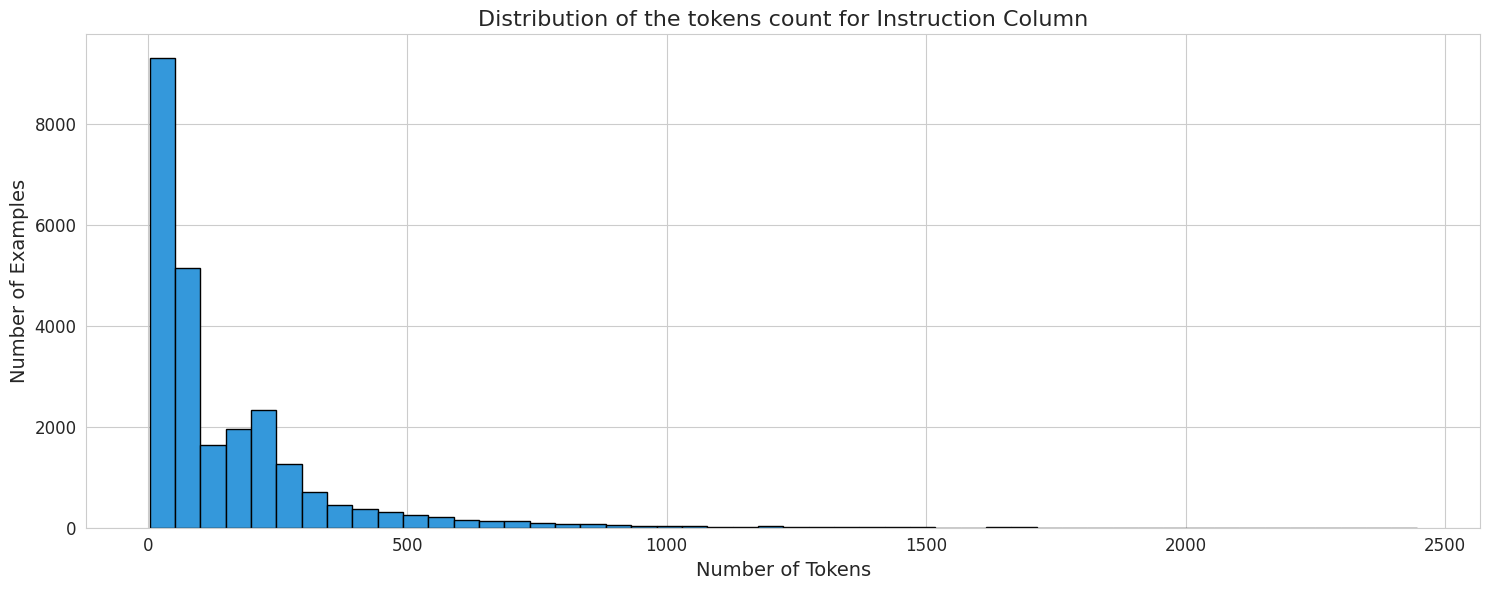

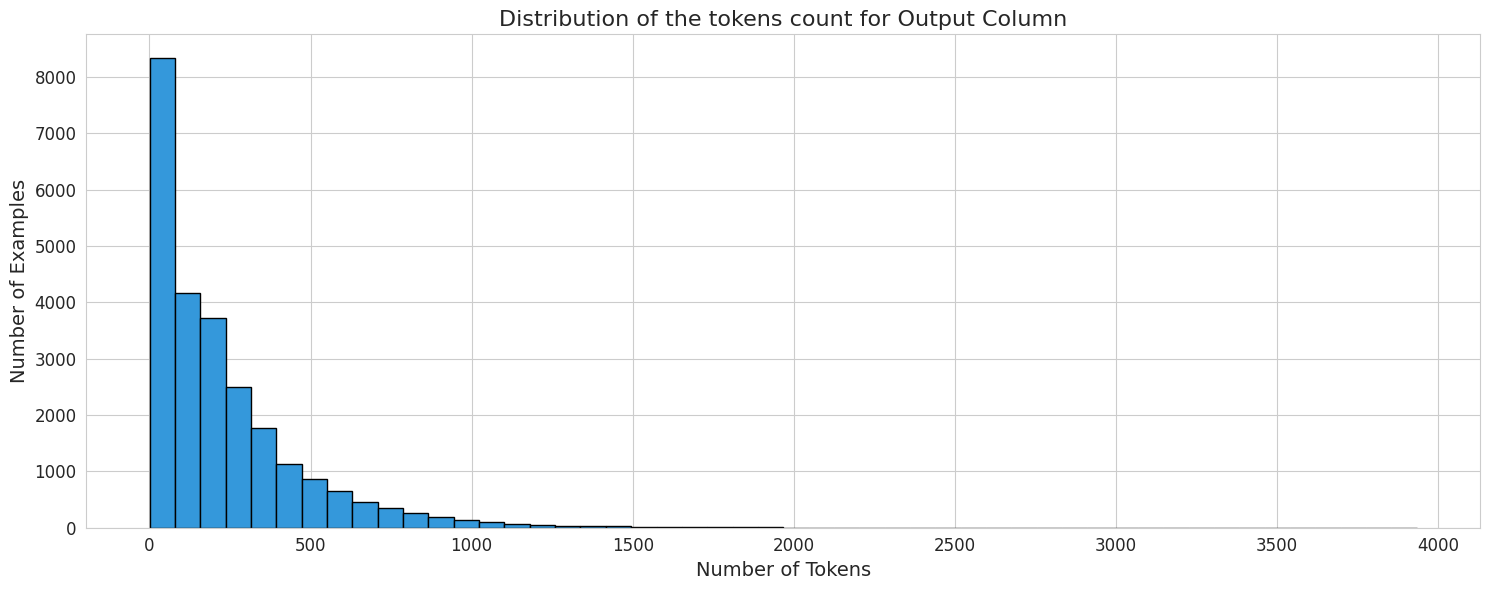

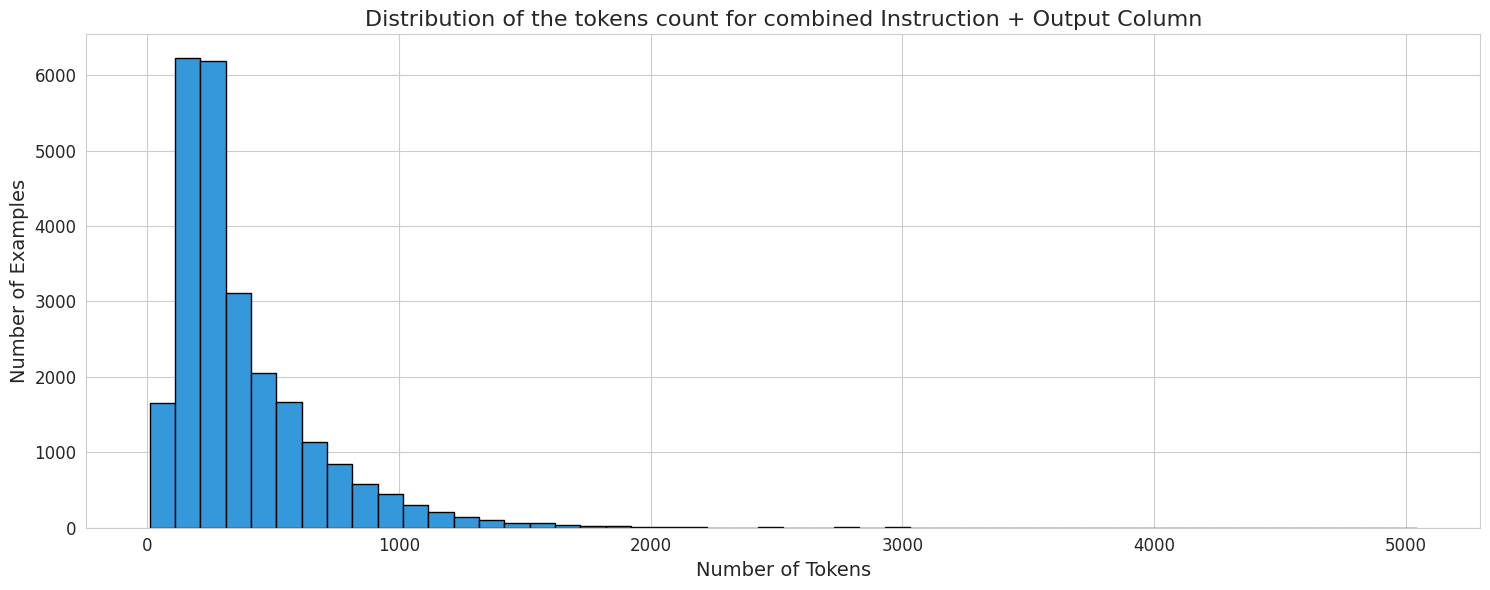

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot the distribution of token counts.
def plot_distribution(tokens_count, title):
    # Set the style of the plot.
    sns.set_style("whitegrid")

    # Create a new figure with a specified size.
    plt.figure(figsize=(15, 6))

    # Create a histogram of token counts with specified bins, color, and edge color.
    plt.hist(tokens_count, bins=50, color='#3498db', edgecolor='black')

    # Set the title of the plot.
    plt.title(title, fontsize=16)

    # Set labels for the x and y axes.
    plt.xlabel("Number of Tokens", fontsize=14)
    plt.ylabel("Number of Examples", fontsize=14)

    # Set the font size for x and y tick labels.
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout to prevent clipping of titles and labels.
    plt.tight_layout()

    # Display the plot.
    plt.show()

# Plot the distribution of token counts for the instruction column.
plot_distribution(instruction_tokens_count, "Distribution of the tokens count for Instruction Column")

# Plot the distribution of token counts for the output column.
plot_distribution(output_tokens_count, "Distribution of the tokens count for Output Column")

# Plot the distribution of token counts for the combined instruction + output column.
plot_distribution(combine_tokens_count, "Distribution of the tokens count for combined Instruction + Output Column")

# The mean is around 500 tokens, but there is a long tail distribution which goes up to 5000 tokens.


**Remove rows where the combined token count (from both the Instruction and Output columns) exceeds 2048 tokens.**

The default maximum context size for the Llama 2 model is 4096 tokens

Number of Valid Rows: 24895
Removing: 31 rows....


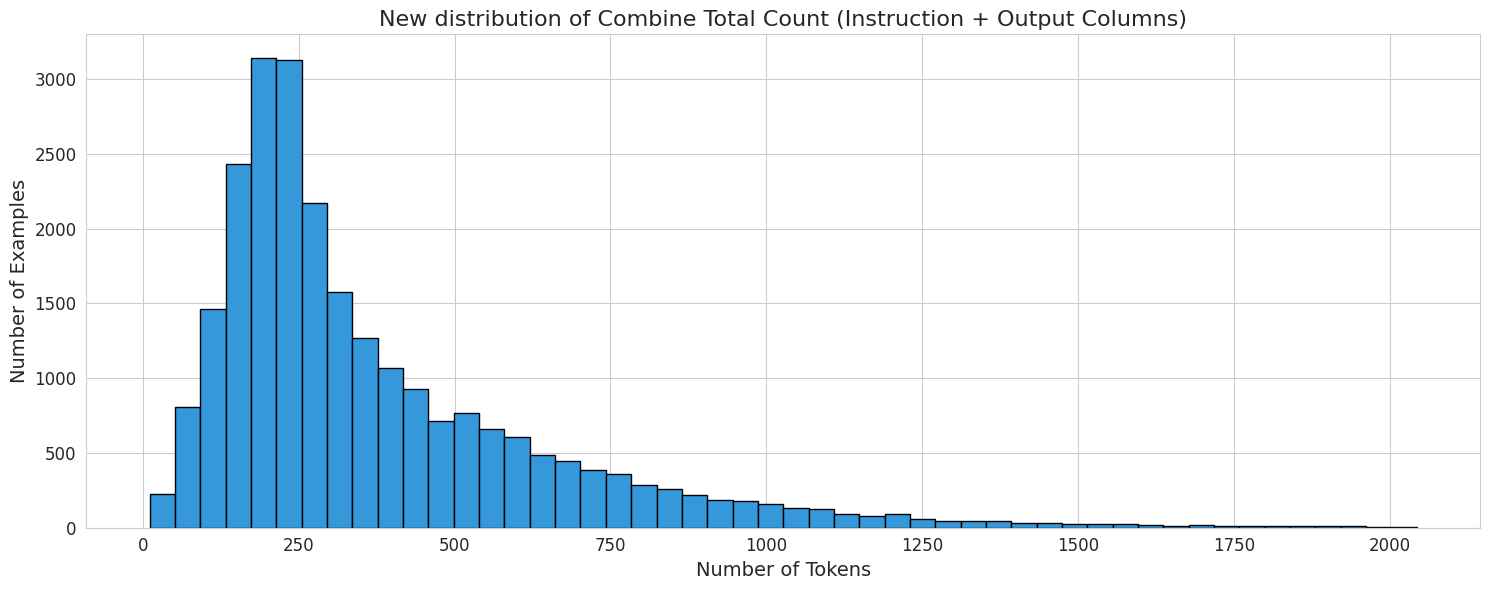

In [ ]:
# Define the maximum token count threshold.
max_token_threshold = 2048

# Filter rows with less than or equal to 2048 tokens.
valid_indices = [i for i, count in enumerate(combine_tokens_count) if count <= max_token_threshold]

# Print the number of valid rows.
print(f"Number of Valid Rows: {len(valid_indices)}")

# Calculate the number of rows to remove.
rows_to_remove = len(dataset['train']) - len(valid_indices)

# Print the number of rows to be removed.
print(f"Removing: {rows_to_remove} rows....")

# Extract valid rows based on indices.
dataset['train'] = dataset['train'].select(valid_indices)

# Get token counts for valid rows.
token_counts = [combine_tokens_count[i] for i in valid_indices]

# Plot the new distribution of combined token counts for the remaining valid rows.
plot_distribution(token_counts, "New distribution of Combine Total Count (Instruction + Output Columns)")


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'data_source'],
        num_rows: 24895
    })
})

In [ ]:
dataset["train"].to_pandas()

input                                             output  \
0            To find the probability of the spinner landing...   
1            I need to choose 6 people out of 14, and the o...   
2            First we count the number of all 4-letter word...   
3            She can do this if and only if at least one of...   
4            Think of the problem as a sequence of H's and ...   
...     ...                                                ...   
24890        There are several formulas that generate all p...   
24891        Sure, here are some of the best universities:\...   
24892        [Enter stage left]\n\nFirst Citizen: Good morr...   
24893        That's a very thoughtful idea! Here are some s...   
24894        Certainly! Here's an implementation of the Tim...   

                                             instruction    data_source  
0      A board game spinner is divided into three par...  MATH/PRM-800K  
1      My school's math club has 6 boys and 8 girls. ...  MATH/PRM-800K  
2      How many 4-letter words with at least one cons...  MATH/PRM-800K  
3      Melinda will roll two standard six-sided dice ...  MATH/PRM-800K  
4      Let $p$ be the probability that, in the proces...  MATH/PRM-800K  
...                                                  ...            ...  
24890  Can we find a formula to generate all prime nu...        guanaco  
24891  What are some of the best university's for stu...        guanaco  
24892  Write me a SPL (Shakespeare Programming Langua...        guanaco  
24893  Hi. I want to make an embossed picture for my ...        guanaco  
24894  Please implement the Timsort algorithm on Lean...        guanaco  

[24895 rows x 4 columns]

**For near-deduplication using embeddings, consider utilizing models available on the MTEB (Model Text Embedding Benchmarks) leaderboard on Hugging Face. These models offer advanced capabilities for embedding text data, which can be leveraged to identify and remove near-duplicate instances within a dataset.**

In [ ]:
# Import necessary libraries and modules
from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.autonotebook import tqdm
import numpy as np

# Define a function to deduplicate a dataset based on embeddings similarity
def deduplicate_dataset(dataset: Dataset, model: str, threshold: float):
    # Initialize the SentenceTransformer model with the specified name
    sentence_model = SentenceTransformer(model)

    # Extract the output column from the dataset
    outputs = [example["output"] for example in dataset["train"]]

    # Encode the text into embeddings using the SentenceTransformer model
    print("Convert the text to embeddings....")
    embeddings = sentence_model.encode(outputs, show_progress_bar=True)
    dimensions = embeddings.shape[1]  # Get the dimensions of the embeddings
    print("Dimensions of the embedding", embeddings.shape)

    # Create an index using Faiss as the Vector Database
    index = faiss.IndexFlatIP(dimensions)

    # Normalize the embeddings
    normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Add the normalized embeddings to the index
    index.add(normalized_embeddings)
    print("Filtering out near duplicates....")

    # Search for nearest neighbors for each embedding
    D, I = index.search(normalized_embeddings, k=2)

    # Initialize a list to store indices of samples to keep
    to_keep = []

    # Iterate over each embedding
    for i in tqdm(range(len(embeddings)), desc="Filtering"):
        # If the similarity with the second closest vector is above the threshold
        if D[i, 1] >= threshold:
            # Check if the current item or its nearest neighbor is already in the to_keep list
            nearest_neighbor = I[i, 1]
            if i not in to_keep and nearest_neighbor not in to_keep:
                # If not, add the current item to the list
                to_keep.append(i)
        else:
            # If the similarity is below the threshold, always keep the current item
            to_keep.append(i)

    # Filter the dataset based on the indices to keep
    dataset = dataset["train"].select(to_keep)

    # Print the filtered dataset
    print(dataset.to_pandas())

    # Return the deduplicated dataset wrapped in a DatasetDict
    return DatasetDict({"train": dataset})

# Call the deduplicate_dataset function to deduplicate the dataset using the specified model and threshold
deduped_dataset = deduplicate_dataset(dataset, "thenlper/gte-large", 0.95)


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Convert the text to embeddings....


Batches:   0%|          | 0/778 [00:00<?, ?it/s]

Dimensions of the embedding (24895, 1024)
Filtering out near duplicates....


Filtering:   0%|          | 0/24895 [00:00<?, ?it/s]

      input                                             output  \
0            To find the probability of the spinner landing...   
1            I need to choose 6 people out of 14, and the o...   
2            First we count the number of all 4-letter word...   
3            She can do this if and only if at least one of...   
4            Think of the problem as a sequence of H's and ...   
...     ...                                                ...   
18183        There are several formulas that generate all p...   
18184        Sure, here are some of the best universities:\...   
18185        [Enter stage left]\n\nFirst Citizen: Good morr...   
18186        That's a very thoughtful idea! Here are some s...   
18187        Certainly! Here's an implementation of the Tim...   

                                             instruction    data_source  
0      A board game spinner is divided into three par...  MATH/PRM-800K  
1      My school's math club has 6 boys and 8 girls. ...  M

In [ ]:
deduped_dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'data_source'],
        num_rows: 18188
    })
})

In [ ]:
deduped_dataset["train"].to_pandas()

input                                             output  \
0            To find the probability of the spinner landing...   
1            I need to choose 6 people out of 14, and the o...   
2            First we count the number of all 4-letter word...   
3            She can do this if and only if at least one of...   
4            Think of the problem as a sequence of H's and ...   
...     ...                                                ...   
18183        There are several formulas that generate all p...   
18184        Sure, here are some of the best universities:\...   
18185        [Enter stage left]\n\nFirst Citizen: Good morr...   
18186        That's a very thoughtful idea! Here are some s...   
18187        Certainly! Here's an implementation of the Tim...   

                                             instruction    data_source  
0      A board game spinner is divided into three par...  MATH/PRM-800K  
1      My school's math club has 6 boys and 8 girls. ...  MATH/PRM-800K  
2      How many 4-letter words with at least one cons...  MATH/PRM-800K  
3      Melinda will roll two standard six-sided dice ...  MATH/PRM-800K  
4      Let $p$ be the probability that, in the proces...  MATH/PRM-800K  
...                                                  ...            ...  
18183  Can we find a formula to generate all prime nu...        guanaco  
18184  What are some of the best university's for stu...        guanaco  
18185  Write me a SPL (Shakespeare Programming Langua...        guanaco  
18186  Hi. I want to make an embossed picture for my ...        guanaco  
18187  Please implement the Timsort algorithm on Lean...        guanaco  

[18188 rows x 4 columns]

In [ ]:
# Print the number of rows in the original dataset
# `dataset["train"]` refers to the training split of the dataset
print("Number of rows in the Original Dataset", len(dataset["train"]))

# Print the number of rows in the deduplicated dataset
# `deduped_dataset["train"]` refers to the training split of the dataset after duplicates have been removed
print("Number of rows in the deduped dataset", len(deduped_dataset["train"]))

# Calculate and print the number of rows removed during the deduplication process
# This is computed by subtracting the number of rows in the deduplicated dataset from the original dataset
print(f"Number of rows removed: {len(dataset['train']) - len(deduped_dataset['train'])}")


Number of rows in the Original Dataset 24895
Number of rows in the deduped dataset 18188
Number of rows removed: 6707


In [ ]:
# Tokenize each row in the 'instruction' column of the deduplicated dataset and count the tokens
# The tokenizer.tokenize method splits the text into tokens (words/subwords)
instruction_tokens_count = [len(tokenizer.tokenize(example["instruction"])) for example in deduped_dataset["train"]]
print("Instruction Tokens Count", instruction_tokens_count)
# Print the total number of entries processed for instruction token counts
print("Length of Instruction Tokens Count", len(instruction_tokens_count))

# Tokenize each row in the 'output' column of the deduplicated dataset and count the tokens
output_tokens_count = [len(tokenizer.tokenize(example["output"])) for example in deduped_dataset["train"]]
print("Output Tokens Count", output_tokens_count)
# Print the total number of entries processed for output token counts
print("Length of the Output Tokens Count", len(output_tokens_count))

# Combine the token counts for instruction and output by adding corresponding counts together
# This shows the total number of tokens per row across both columns
combine_tokens_count = [instruction + output for instruction, output in zip(instruction_tokens_count, output_tokens_count)]
print("Combine Tokens Count", combine_tokens_count)
# Print the total number of entries for which combined token counts have been calculated
print("Length of the Combine Tokens Count", len(combine_tokens_count))


Instruction Tokens Count [85, 53, 75, 86, 82, 30, 46, 36, 101, 41, 19, 102, 34, 20, 54, 132, 104, 37, 171, 62, 23, 52, 43, 149, 184, 124, 47, 112, 60, 55, 95, 114, 59, 14, 52, 51, 153, 23, 26, 44, 21, 83, 19, 62, 55, 11, 65, 37, 100, 44, 61, 154, 88, 12, 37, 32, 191, 148, 77, 30, 25, 69, 27, 22, 115, 53, 31, 35, 86, 72, 119, 17, 130, 25, 10, 25, 61, 33, 26, 37, 93, 30, 193, 21, 11, 88, 61, 22, 19, 305, 81, 87, 73, 51, 111, 64, 66, 25, 29, 349, 126, 60, 117, 21, 40, 54, 63, 30, 74, 68, 38, 24, 65, 75, 67, 79, 110, 74, 171, 84, 372, 79, 18, 31, 22, 27, 13, 68, 120, 43, 41, 48, 665, 32, 35, 47, 97, 110, 57, 51, 17, 42, 25, 247, 45, 56, 100, 10, 10, 335, 72, 42, 27, 13, 58, 173, 10, 239, 55, 54, 122, 25, 72, 56, 10, 14, 35, 328, 41, 54, 64, 102, 57, 228, 232, 40, 57, 33, 30, 55, 38, 136, 108, 53, 66, 89, 23, 128, 123, 77, 31, 14, 107, 37, 151, 44, 144, 46, 37, 43, 195, 83, 82, 23, 322, 170, 15, 46, 78, 44, 24, 34, 203, 86, 152, 40, 49, 53, 23, 54, 33, 42, 61, 115, 55, 107, 265, 58, 18, 275

In [ ]:
# Define a function to retrieve the top k rows with the highest number of tokens
def get_top_k_rows(dataset, tokens_count, k):
    # Sort indices of the rows based on the token counts in descending order
    sorted_indices = sorted(range(len(tokens_count)), key=lambda i: tokens_count[i], reverse=True)
    # Select the top k indices from the sorted list
    top_k_indices = sorted_indices[:k]
    print("Top K Indices", top_k_indices)
    # Print the number of top k indices to confirm the size
    print("Length of Top K Indices", len(top_k_indices))

    # Extract the Top K rows based on the indices and store them in a dictionary
    top_k_data = {
        "instruction": [dataset["train"][i]["instruction"] for i in top_k_indices],
        "output": [dataset["train"][i]["output"] for i in top_k_indices]
    }
    # Return the top k rows as a new Dataset object
    return Dataset.from_dict(top_k_data)

# Number of rows to retrieve
k = 1000
# Get the top 1000 rows with the most number of tokens
top_k_dataset = get_top_k_rows(deduped_dataset, combine_tokens_count, k)


Top K Indices [17975, 833, 17933, 1508, 3194, 9174, 15156, 5188, 16833, 16954, 16681, 16077, 17378, 16921, 16849, 15335, 15600, 16777, 3384, 16584, 10433, 15061, 17103, 802, 15140, 1609, 17002, 6090, 15457, 16126, 5121, 15220, 16067, 16863, 7586, 17112, 6656, 15445, 17290, 3019, 16948, 4727, 15347, 17070, 210, 7803, 14947, 17370, 16163, 18162, 9170, 15668, 13504, 15638, 15684, 15031, 17751, 16335, 15389, 16160, 16178, 16595, 16117, 16862, 4703, 18015, 16793, 16619, 17622, 15685, 3469, 16718, 7693, 17054, 16044, 16665, 17705, 15883, 16836, 17236, 16559, 5508, 17259, 15353, 17118, 15474, 16734, 16917, 16449, 15134, 15788, 16632, 16533, 7238, 15409, 17619, 605, 15925, 16723, 16223, 16321, 4770, 15358, 16997, 15384, 16949, 16459, 15125, 17049, 3312, 7657, 15242, 3074, 10345, 3208, 15766, 16618, 532, 17401, 10101, 17596, 5165, 10110, 15506, 15165, 16914, 1832, 18029, 5378, 15178, 15208, 1619, 14335, 10203, 15736, 17174, 15040, 17077, 15492, 10569, 17031, 15966, 18035, 17141, 17020, 15913, 1

In [ ]:
top_k_dataset

Dataset({
    features: ['instruction', 'output'],
    num_rows: 1000
})

In [ ]:

dataset = DatasetDict({"train": top_k_dataset})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'output'],
        num_rows: 1000
    })
})

In [ ]:

dataset["train"].to_pandas()

instruction  \
0    Let's come up with a rich and complex alien wo...   
1    Let\n$$p(x,y) = a_0 + a_1x + a_2y + a_3x^2 + a...   
2    Given the code below, refactor it, add comment...   
3    Find the area of the region described by $x \g...   
4    Let $P$ be the plane passing through the origi...   
..                                                 ...   
995  Hello. My name is Mike. I have a message left ...   
996  Given a prime $p$ and an integer $a$, we say t...   
997  Let $f$ be defined by  \[f(x) = \left\{\n\begi...   
998  BEGININPUT\nBEGINCONTEXT\ndate: August 5, 2021...   
999  BEGININPUT\nBEGINCONTEXT\ndate: August 14, 201...   

                                                output  
0    Planet Name: Xylothar\n\nXylothar is a diverse...  
1    Observe that  \begin{align*}\np(0,0) &= a_0 = ...  
2    Here is the refactored and commented version:\...  
3    Let $n = \lfloor x \rfloor,$ and let $\{x\} = ...  
4    Let $\mathbf{v} = \begin{pmatrix} x \\ y \\ z ...  
..                                                 ...  
995  Hello Mike, it's nice to meet you. As an AI la...  
996  To find the primitive roots $\pmod 7$, I need ...  
997  The number $f^{-1}(-3)$ is the value of $x$ su...  
998  Dr. Eleanor Thompson's study found that partic...  
999  Charles Leroux won the Golden Bread Award in 1...  

[1000 rows x 2 columns]

In [ ]:
# Tokenize each row in the 'instruction' column of the dataset and count the number of tokens
# Using a list comprehension to apply tokenizer.tokenize() to each instruction
instruction_tokens_count = [len(tokenizer.tokenize(example["instruction"])) for example in dataset["train"]]
# Print the total number of tokens for each instruction in the dataset
print("Instruction Tokens Count", instruction_tokens_count)
# Print the number of entries that were processed to get token counts for instructions
print("Length of Instruction Tokens Count", len(instruction_tokens_count))

# Tokenize each row in the 'output' column of the dataset and count the number of tokens
# Using a list comprehension to apply tokenizer.tokenize() to each output
output_tokens_count = [len(tokenizer.tokenize(example["output"])) for example in dataset["train"]]
# Print the total number of tokens for each output in the dataset
print("Output Tokens Count", output_tokens_count)
# Print the number of entries that were processed to get token counts for outputs
print("Length of the Output Tokens Count", len(output_tokens_count))

# Combine the token counts from the instruction and output by adding them together for each row
# Using zip to iterate over paired instruction and output token counts
combine_tokens_count = [instruction + output for instruction, output in zip(instruction_tokens_count, output_tokens_count)]
# Print the combined total number of tokens for each row across both instruction and output columns
print("Combine Tokens Count", combine_tokens_count)
# Print the total number of entries for which combined token counts have been calculated
print("Length of the Combine Tokens Count", len(combine_tokens_count))


Instruction Tokens Count [315, 201, 553, 98, 77, 125, 47, 1200, 1468, 1630, 1871, 1512, 1850, 1686, 42, 1673, 1616, 1495, 94, 65, 416, 62, 1768, 79, 1473, 50, 1388, 877, 71, 1831, 290, 1259, 1512, 1477, 93, 1373, 897, 1694, 1559, 95, 1504, 114, 1506, 1317, 24, 40, 1735, 1630, 47, 16, 204, 1597, 1759, 55, 50, 1642, 708, 1465, 37, 73, 51, 61, 31, 1676, 531, 646, 1215, 1476, 128, 56, 721, 1620, 105, 1551, 1202, 45, 1345, 1403, 39, 1515, 1398, 531, 1572, 39, 1238, 1548, 84, 1260, 1295, 110, 140, 1549, 1339, 1442, 51, 470, 158, 30, 1424, 1314, 48, 1352, 1138, 1154, 1447, 1223, 1423, 1201, 1218, 849, 228, 48, 105, 144, 84, 1398, 1131, 585, 1214, 477, 27, 142, 428, 33, 60, 65, 124, 72, 568, 1284, 132, 153, 1273, 234, 130, 81, 1326, 1239, 44, 46, 1335, 1170, 1298, 1341, 1079, 1365, 1246, 47, 1232, 133, 447, 1228, 1221, 1431, 66, 379, 124, 1403, 169, 137, 175, 1176, 1405, 1056, 1024, 1212, 50, 45, 1309, 708, 52, 493, 124, 59, 1420, 655, 1188, 1297, 54, 1213, 1034, 1136, 41, 71, 33, 52, 37, 1308

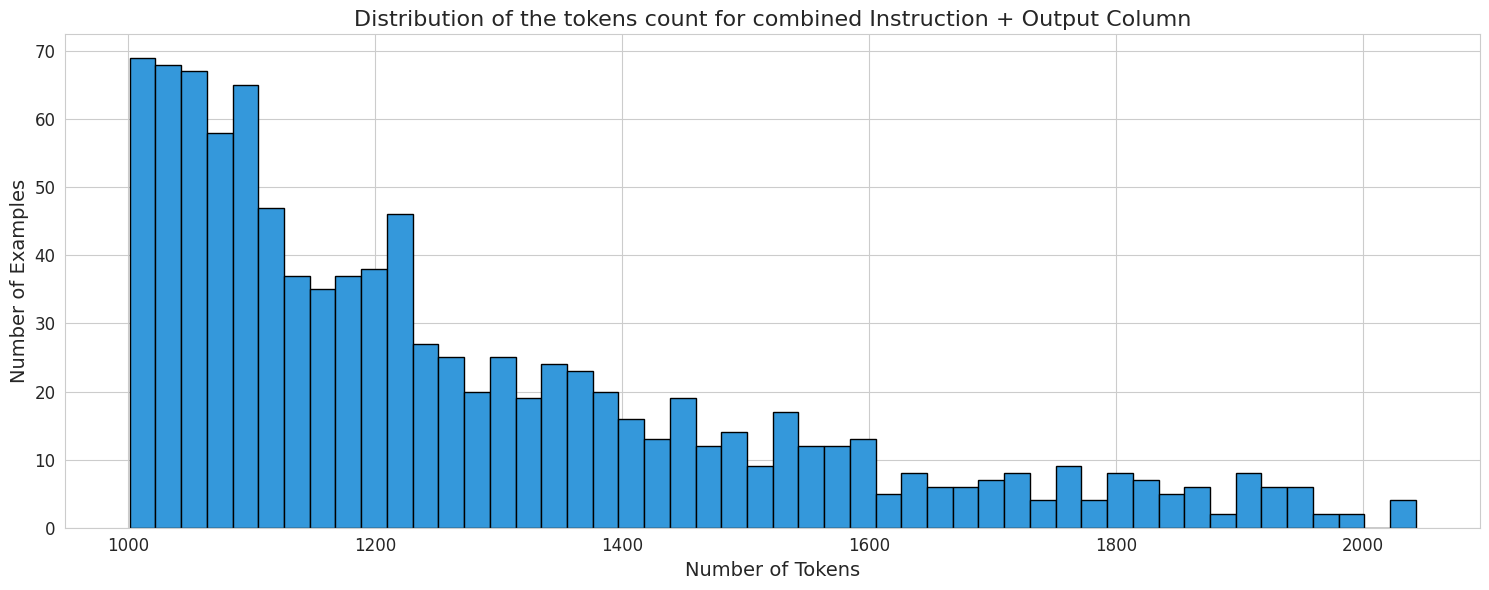

In [ ]:
#Combine Tokens Count
plot_distribution(combine_tokens_count, "Distribution of the tokens count for combined Instruction + Output Column")

In [ ]:

# Read as pandas DataFrame
dataset['train'].to_pandas()

instruction  \
0    Let's come up with a rich and complex alien wo...   
1    Let\n$$p(x,y) = a_0 + a_1x + a_2y + a_3x^2 + a...   
2    Given the code below, refactor it, add comment...   
3    Find the area of the region described by $x \g...   
4    Let $P$ be the plane passing through the origi...   
..                                                 ...   
995  Hello. My name is Mike. I have a message left ...   
996  Given a prime $p$ and an integer $a$, we say t...   
997  Let $f$ be defined by  \[f(x) = \left\{\n\begi...   
998  BEGININPUT\nBEGINCONTEXT\ndate: August 5, 2021...   
999  BEGININPUT\nBEGINCONTEXT\ndate: August 14, 201...   

                                                output  
0    Planet Name: Xylothar\n\nXylothar is a diverse...  
1    Observe that  \begin{align*}\np(0,0) &= a_0 = ...  
2    Here is the refactored and commented version:\...  
3    Let $n = \lfloor x \rfloor,$ and let $\{x\} = ...  
4    Let $\mathbf{v} = \begin{pmatrix} x \\ y \\ z ...  
..                                                 ...  
995  Hello Mike, it's nice to meet you. As an AI la...  
996  To find the primitive roots $\pmod 7$, I need ...  
997  The number $f^{-1}(-3)$ is the value of $x$ su...  
998  Dr. Eleanor Thompson's study found that partic...  
999  Charles Leroux won the Golden Bread Award in 1...  

[1000 rows x 2 columns]

**Chat template**

In [ ]:
# Define a function to format each example in the dataset with a template for chat interaction
def chat_template(example):
    # Append a formatted template to the 'instruction' field of each example
    # This format separates the instruction from the expected response, clearly defining the structure
    example["instruction"] = f"### Instruction:\n{example['instruction']}\n\n### Response:\n"
    return example

# Apply the chat_template function to each example in the dataset
# This uses the .map method of the dataset, which applies a specified function to each element
dataset = dataset.map(chat_template)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
dataset["train"].to_pandas()

instruction  \
0    ### Instruction:\nLet's come up with a rich an...   
1    ### Instruction:\nLet\n$$p(x,y) = a_0 + a_1x +...   
2    ### Instruction:\nGiven the code below, refact...   
3    ### Instruction:\nFind the area of the region ...   
4    ### Instruction:\nLet $P$ be the plane passing...   
..                                                 ...   
995  ### Instruction:\nHello. My name is Mike. I ha...   
996  ### Instruction:\nGiven a prime $p$ and an int...   
997  ### Instruction:\nLet $f$ be defined by  \[f(x...   
998  ### Instruction:\nBEGININPUT\nBEGINCONTEXT\nda...   
999  ### Instruction:\nBEGININPUT\nBEGINCONTEXT\nda...   

                                                output  
0    Planet Name: Xylothar\n\nXylothar is a diverse...  
1    Observe that  \begin{align*}\np(0,0) &= a_0 = ...  
2    Here is the refactored and commented version:\...  
3    Let $n = \lfloor x \rfloor,$ and let $\{x\} = ...  
4    Let $\mathbf{v} = \begin{pmatrix} x \\ y \\ z ...  
..                                                 ...  
995  Hello Mike, it's nice to meet you. As an AI la...  
996  To find the primitive roots $\pmod 7$, I need ...  
997  The number $f^{-1}(-3)$ is the value of $x$ su...  
998  Dr. Eleanor Thompson's study found that partic...  
999  Charles Leroux won the Golden Bread Award in 1...  

[1000 rows x 2 columns]

In [ ]:
! pip install huggingface_hub --q

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write)

In [ ]:
dataset.push_to_hub("malikashish997/create_data")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/316 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/malikashish997/create_data/commit/0c5d10aeb48d5d1b9e67286ae8de1b173af81e1e', commit_message='Upload dataset', commit_description='', oid='0c5d10aeb48d5d1b9e67286ae8de1b173af81e1e', pr_url=None, pr_revision=None, pr_num=None)